### Problem Statement:
Kickstarter is a crowdfunding website where people can ask people to invest in various projects and concept products. They have provided data having different attributes of a project like its name, category, the currency of funding, deadline for crowdfunding, goal and raised amounts for funding, etc.

 

### Attribute information:

- id - project id
- name - project name
- subcategory - project subcategory
- category - project category
- currency - project currency
- deadline - deadline for crowdfunding on Kickstarter
- goal - goal amount in project currency
- launched - launch date on Kickstarter
- pledged - pledged (raised) amount in the project currency
- state - project state
- backers - count of backers
- country - project country
- usd_pledged_real - pledged (raised) amount in USD
- usd_goal_real - goal amount in USD

# Importing the libraries and loading the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv("KickStarterProjects.csv") #, index_col=0
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string https://realpython.com/python-f-strings/

# I'm now going to look at 5 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=5)

There are 378661 rows and 14 columns.


,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
99838,1506962323,2018 Comic Con/ Horror Con/ GMCC,Art,Art,USD,10-10-2017,600.0,31-08-2017 04:05,600.00,successful,4,US,600.00,600.0
15731,1079621785,Ixion's The Four Disgracers,Theater,Theater,USD,26-04-2014,3500.0,27-03-2014 20:21,2920.00,failed,54,US,2920.00,3500.0
339459,799118140,Irving Comics Inc. (Canceled),Comics,Comics,USD,16-04-2015,10000.0,17-03-2015 20:58,75.00,canceled,1,US,75.00,10000.0
100211,1508896926,Breakaway,Shorts,Film & Video,USD,17-10-2011,5000.0,16-09-2011 20:11,5365.00,successful,60,US,5365.00,5000.0
170820,1869016023,the Atomic Café Mobile,Drinks,Food,USD,19-06-2015,5000.0,20-05-2015 10:47,5111.06,successful,53,US,5111.06,5000.0


### Data Preprocessing

**Creating a copy of the data (to avoid any unnecessary changes to the original dataset)**

- Dropping some columns to make the dataset manageable

In [3]:
df1=df.copy()

df1.drop(["currency","goal"],axis=1,inplace=True)
f'There are {df1.shape[0]} rows and {df1.shape[1]} columns.'

'There are 378661 rows and 12 columns.'

### Checking for missing values and dropping affected rows (if necessary)

In [4]:
df1.isnull().sum().sort_values(ascending=False) #Gets the columns with the missing values, and number of missing values.

name                4
usd_goal_real       0
usd_pledged_real    0
country             0
backers             0
state               0
pledged             0
launched            0
deadline            0
category            0
subcategory         0
ID                  0
dtype: int64

In [5]:
df1= df1.dropna() #drop ROWS with missing values
df1.isnull().sum().sort_values(ascending=False)

usd_goal_real       0
usd_pledged_real    0
country             0
backers             0
state               0
pledged             0
launched            0
deadline            0
category            0
subcategory         0
name                0
ID                  0
dtype: int64

**Checking for different projects states and their frequency**

In [6]:
df1.state.value_counts().sort_values(ascending=False)

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

### Summarizing the data and preliminary analysis

In [7]:
df1.describe()

,ID,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786570e+05,3.786570e+05,378657.000000,3.786570e+05,3.786570e+05
mean,1.074732e+09,9.683080e+03,105.618544,9.059018e+03,4.545425e+04
std,6.190872e+08,9.563651e+04,907.189767,9.097382e+04,1.152956e+06
min,5.971000e+03,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382499e+08,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,6.200000e+02,12.000000,6.243800e+02,5.500000e+03
75%,1.610149e+09,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


In [39]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,378657,NaN,NaN,NaN,1.07473e+09,6.19087e+08,5971,5.3825e+08,1.07528e+09,1.61015e+09,2.14748e+09
name,378657,375722,#NAME?,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subcategory,378657,159,Product Design,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,378657,15,Film & Video,63584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deadline,378657,3164,08-08-2014,705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
launched,378657,347031,20-06-2017 16:00,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pledged,378657,NaN,NaN,NaN,9683.08,95636.5,0,30,620,4076,2.0339e+07
state,378657,6,failed,197716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backers,378657,NaN,NaN,NaN,105.619,907.19,0,2,12,56,219382
country,378657,23,US,292624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### It seems like there are same outliers in the dataset

**Pick some to investigate**
- backers
- usd_goal_real

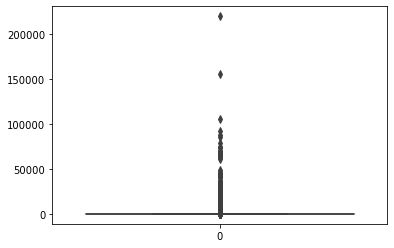

In [8]:
sns.boxplot(data=df1["backers"])
plt.show()

- It seems there are many outliers in the backers. What to do about that depends on the object. Some of the things that can be done about that are below. 



**1. MinMaxScaling**

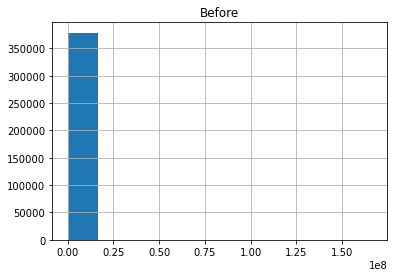

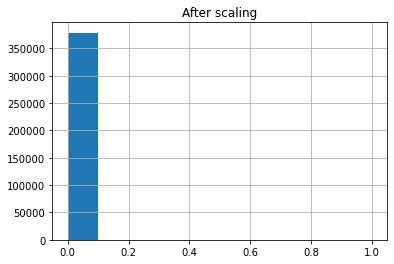

,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,new_usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.0,failed,0,GB,0.0,0.000009,0.000009
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.0,failed,15,US,2421.0,0.000180,0.000180


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df1["usd_goal_real"].hist()
plt.title("Before")
plt.show()

df1[["usd_goal_real"]]= MinMaxScaler().fit_transform(df1[["usd_goal_real"]])

df1["usd_goal_real"].hist()
plt.title("After scaling")
plt.show()
df1["new_usd_goal_real"] = MinMaxScaler().fit_transform(df1[["usd_goal_real"]])
df1.head(2)

- The data is still very skewed.

**2. StandardScaler**

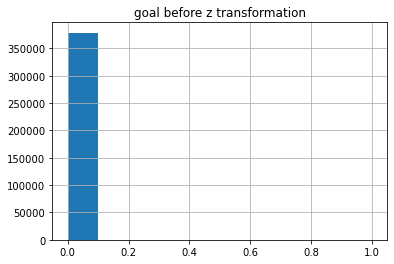

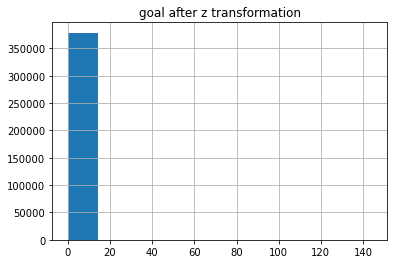

In [10]:
std_scaler = StandardScaler()

df1['usd_goal_real'].hist()
plt.title('goal before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['usd_goal_real']] as a 1 column 
# DataFrame rather than a Series, like if I did df['usd_goal_real']


df1['goal_z_std'] = std_scaler.fit_transform(df1[['usd_goal_real']])
df1['goal_z_std'].hist()
plt.title('goal after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
#df.drop(['usd_goal_real'], axis=1, inplace=True) 
# Columns can be dropped if they are no longer needed, and it makes the dataset neater.

In [11]:
df1.head(2)

,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,new_usd_goal_real,goal_z_std
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.0,failed,0,GB,0.0,0.000009,0.000009,-0.038094
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.0,failed,15,US,2421.0,0.000180,0.000180,-0.013404


**3. Log transformation**

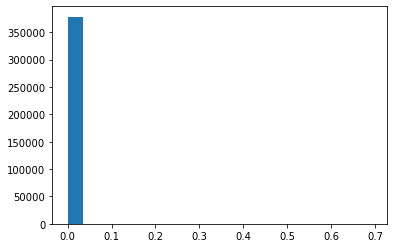

In [40]:
plt.hist(np.log(df1["usd_goal_real"]+1),20) #+1 for the zero values
plt.show()

- The data is still very much skewed, and the transformations did not reduce the it. Plotting a frequency distribution reveals an interesting trend.

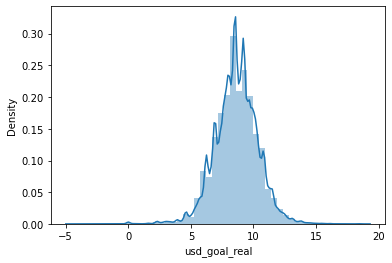

In [51]:
sns.distplot(np.log(df['usd_goal_real']),50)

### Checking what months against number of projects launched.

- getting the months from the dates column

In [35]:
# project_months = pd.to_datetime(df1["launched"]).dt.month
# project_months.value_counts()

# or
df1['launch_month'] = pd.to_datetime(df1['launched'])
df1['launch_month'] = df1['launch_month'] .dt.month # adding in a feature that's just the year

df1['launch_month'] .value_counts().sort_values(ascending = False)

7     34477
1     34346
10    33409
3     32837
11    32135
8     31619
5     31573
9     31538
6     31381
4     31038
2     29876
12    24428
Name: launch_month, dtype: int64

In [14]:
df1.head(3)

,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,new_usd_goal_real,goal_z_std
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.0,failed,0,GB,0.0,0.000009,0.000009,-0.038094
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.0,failed,15,US,2421.0,0.000180,0.000180,-0.013404
2,1000004038,Where is Hank?,Narrative Film,Film & Video,26-02-2013,12-01-2013 00:20,220.0,failed,3,US,220.0,0.000270,0.000270,-0.000394


### Checking what categories have raised the most money

- Two ways of going about it. 

- i) Checking each category
- ii) Checking all categories at once, and sorting them

In [15]:
proj = df1[df1.category== 'Games']
proj.groupby('category')['pledged'].mean()

category
Games    21865.788251
Name: pledged, dtype: float64

In [16]:
proj2 = df1[df1.category== 'Film & Video']
proj2.groupby('category')['pledged'].mean()

category
Film & Video    6362.832348
Name: pledged, dtype: float64

In [17]:
proj3 = df1[df1.category== 'Technology']
proj3.groupby('category')['pledged'].mean()

category
Technology    22586.164814
Name: pledged, dtype: float64

In [18]:
proj4 = df1[df1.category== 'Design']
proj4.groupby('category')['pledged'].mean()

category
Design    27120.653196
Name: pledged, dtype: float64

**More efficient approach**

In [36]:
df1.groupby(['category']).mean().sort_values(by = 'usd_pledged_real', ascending=False)

,ID,pledged,backers,usd_pledged_real,usd_goal_real,new_usd_goal_real,goal_z_std,launch_month
category,,,,,,,,
Design,1.078315e+09,27120.653196,241.307659,24417.846732,0.000252,0.000252,-0.003106,6.537131
Technology,1.071495e+09,22586.164814,164.466609,21151.171165,0.000615,0.000615,0.049294,6.532193
Games,1.072141e+09,21865.788251,321.794408,21042.491442,0.000270,0.000270,-0.000459,6.367641
Comics,1.063611e+09,6899.311189,134.771236,6610.443828,0.000118,0.000118,-0.022449,6.191885
Film & Video,1.074955e+09,6362.832348,66.016230,6158.073703,0.000497,0.000497,0.032238,6.338670
Fashion,1.069690e+09,6549.031814,61.447800,5712.450839,0.000135,0.000135,-0.019985,6.508327
Food,1.081894e+09,5340.163268,54.172466,5113.669716,0.000295,0.000295,0.003110,6.491139
Theater,1.068349e+09,4097.224679,47.057271,4005.918099,0.000163,0.000163,-0.015929,6.184459
Music,1.074995e+09,3992.735602,52.168323,3858.367608,0.000092,0.000092,-0.026091,6.318156


In [22]:
df1['category'].is_unique  #Checking for duplicates in the column. There are duplicates

False